## Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

In [11]:
from google.colab import files
files.upload()

!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d ronaldonyango/global-suicide-rates-1990-to-2022

!unzip global-suicide-rates-1990-to-2022.zip

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
data = pd.read_csv('suicide_rates_1990-2022.csv', sep=",")
print(data.head())

Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/ronaldonyango/global-suicide-rates-1990-to-2022
License(s): other
global-suicide-rates-1990-to-2022.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  global-suicide-rates-1990-to-2022.zip
  inflating: age_std_suicide_rates_1990-2022.csv  
  inflating: suicide_rates_1990-2022.csv  
  RegionCode RegionName CountryCode CountryName  Year   Sex     AgeGroup  \
0         EU     Europe         ALB     Albania  1992  Male   0-14 years   
1         EU     Europe         ALB     Albania  1992  Male   0-14 years   
2         EU     Europe         ALB     Albania  1992  Male   0-14 years   
3         EU     Europe         ALB     Albania  1992  Male   0-14 years   
4         EU     Europe         ALB     Albania  1992  Male  15-24 years   

         Generation  SuicideCount  CauseSpecificDeathPercentage  \
0  Generation Alpha           0.0                      0.000000 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"weriamkrauz","key":"573f35be1bd5feb3926b4d719e1426c6"}'}

Dataset URL: https://www.kaggle.com/datasets/ronaldonyango/global-suicide-rates-1990-to-2022
License(s): other


FileNotFoundError: [Errno 2] No such file or directory: 'suicide_rates_1990-2022.csv'

In [8]:
data = pd.read_csv('suicide_rates_1990-2022.csv', sep=",")

FileNotFoundError: [Errno 2] No such file or directory: 'suicide_rates_1990-2022.csv'

In [ ]:
data.shape

(118560, 18)

In [ ]:
data.dtypes


RegionCode                       object
RegionName                       object
CountryCode                      object
CountryName                      object
Year                              int64
Sex                              object
AgeGroup                         object
Generation                       object
SuicideCount                    float64
CauseSpecificDeathPercentage    float64
DeathRatePer100K                float64
Population                      float64
GDP                             float64
GDPPerCapita                    float64
GrossNationalIncome             float64
GNIPerCapita                    float64
InflationRate                   float64
EmploymentPopulationRatio       float64
dtype: object

In [ ]:
# проверим есть ли пропущенные значения
data.isnull().sum()

RegionCode                          0
RegionName                          0
CountryCode                         0
CountryName                         0
Year                                0
Sex                                 0
AgeGroup                            0
Generation                          0
SuicideCount                      464
CauseSpecificDeathPercentage     4289
DeathRatePer100K                10664
Population                       5920
GDP                              7240
GDPPerCapita                     7240
GrossNationalIncome              9960
GNIPerCapita                    10760
InflationRate                   14460
EmploymentPopulationRatio       11120
dtype: int64

In [ ]:
# Первые 5 строк датасета
data.head()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
3,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
4,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315


In [ ]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 118560


## Обработка пропусков в данных
### Простые стратегии - удаление или заполнение нулями

In [ ]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((118560, 18), (118560, 8))

In [ ]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((118560, 18), (89000, 18))

In [ ]:
# Заполнение всех пропущенных значений нулями
data_new_3 = data.fillna(0)

## "Внедрение значений" - импьютация (imputation)
### Обработка пропусков в числовых данных

In [ ]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))


Колонка SuicideCount. Тип данных float64. Количество пустых значений 464, 0.39%.
Колонка CauseSpecificDeathPercentage. Тип данных float64. Количество пустых значений 4289, 3.62%.
Колонка DeathRatePer100K. Тип данных float64. Количество пустых значений 10664, 8.99%.
Колонка Population. Тип данных float64. Количество пустых значений 5920, 4.99%.
Колонка GDP. Тип данных float64. Количество пустых значений 7240, 6.11%.
Колонка GDPPerCapita. Тип данных float64. Количество пустых значений 7240, 6.11%.
Колонка GrossNationalIncome. Тип данных float64. Количество пустых значений 9960, 8.4%.
Колонка GNIPerCapita. Тип данных float64. Количество пустых значений 10760, 9.08%.
Колонка InflationRate. Тип данных float64. Количество пустых значений 14460, 12.2%.
Колонка EmploymentPopulationRatio. Тип данных float64. Количество пустых значений 11120, 9.38%.


In [ ]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,0.0,0.000000,0.000000,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
1,0.0,0.000000,0.000000,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
2,0.0,0.000000,0.000000,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
3,0.0,0.000000,0.000000,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
4,5.0,3.401361,3.531073,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
...,...,...,...,...,...,...,...,...,...,...
118555,420.0,0.246321,5.286824,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118556,276.0,0.146324,4.876199,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118557,158.0,0.075728,4.203972,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118558,127.0,0.022409,2.931077,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946


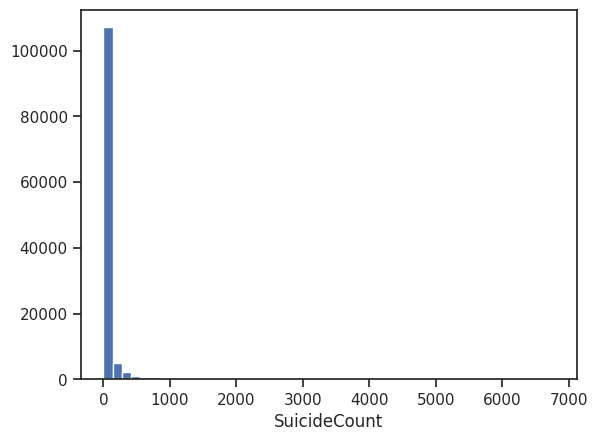

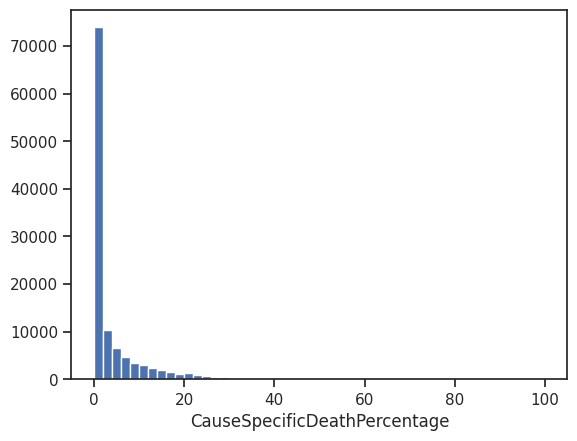

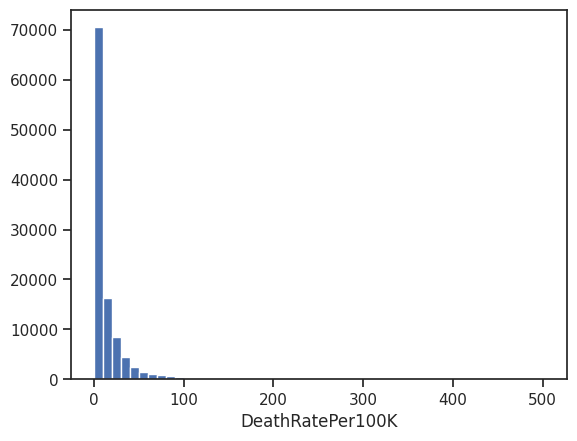

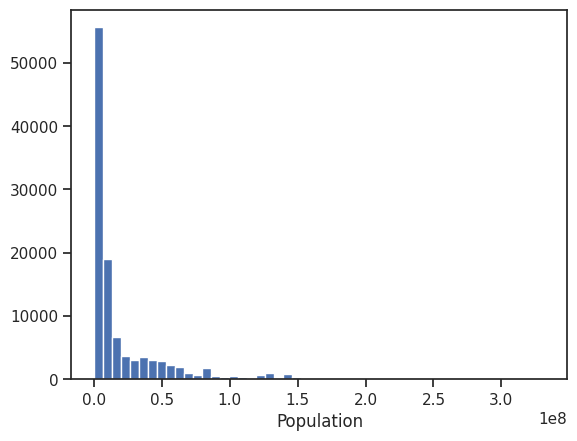

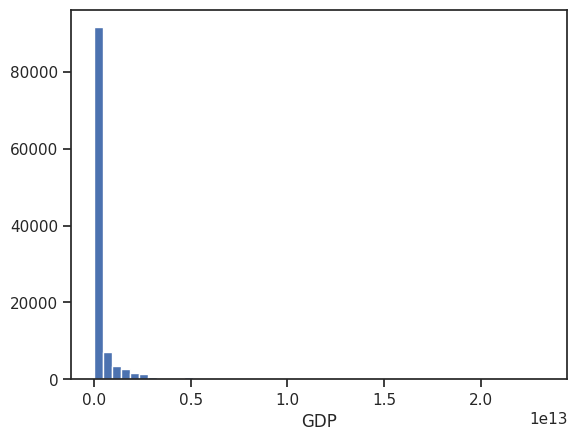

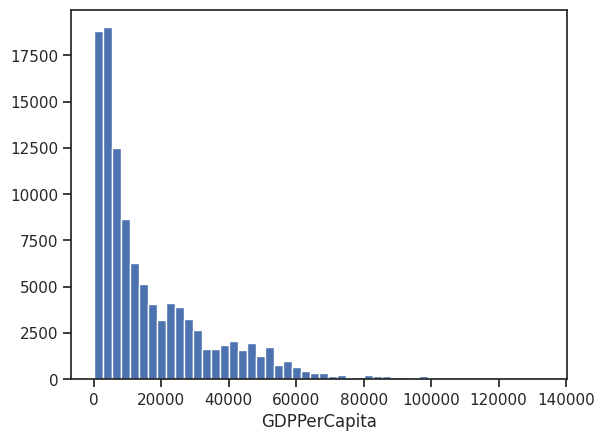

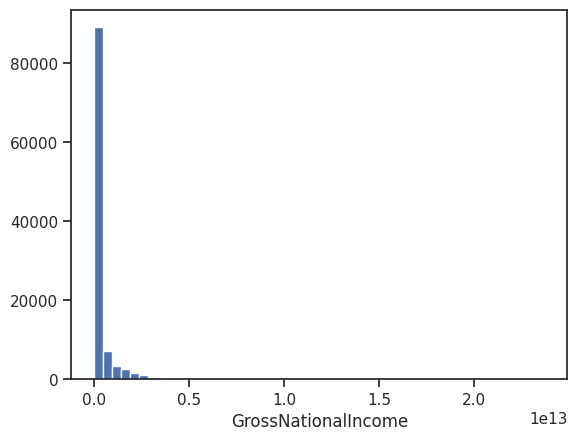

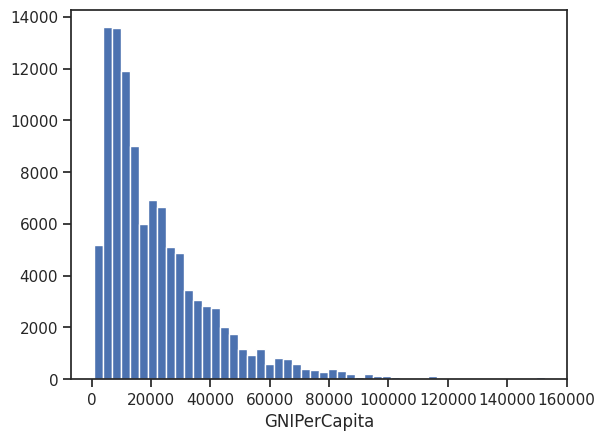

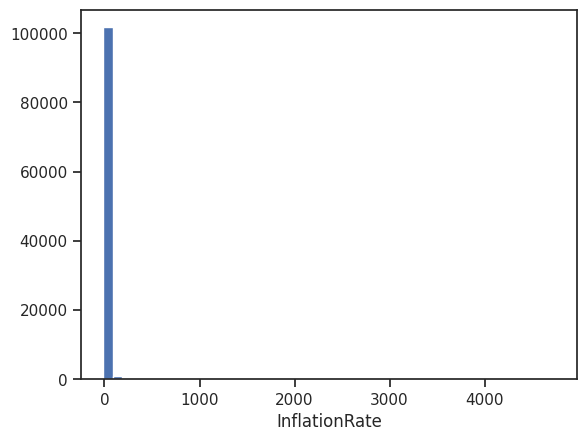

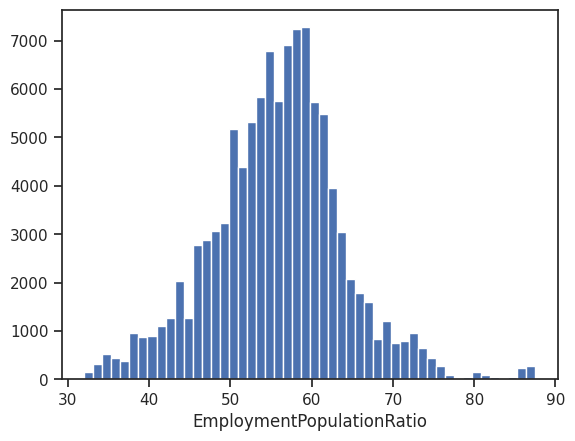

In [ ]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [ ]:
data_num_MasVnrArea = data_num[['SuicideCount']]
data_num_MasVnrArea.head()

,SuicideCount
0,0.0
1,0.0
2,0.0
3,0.0
4,5.0


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [ ]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_MasVnrArea)
mask_missing_values_only


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
strategies=['mean', 'median', 'most_frequent']

In [ ]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_MasVnrArea)
    return data_num_imp[mask_missing_values_only]

In [ ]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([63.63203665, 63.63203665, 63.63203665, 63.63203665, 63.63203665,
        63.63203665, 63.63203665, 63.63203665, 63.63203665, 63.63203665,
        63.63203665, 63.63203665, 63.63203665, 63.63203665, 63.63203665,
        63.63203665, 63.63203665, 63.63203665, 63.63203665, 63.63203665,
        63.63203665, 63.63203665, 63.63203665, 63.63203665, 63.63203665,
        63.63203665, 63.63203665, 63.63203665, 63.63203665, 63.63203665,
        63.63203665, 63.63203665, 63.63203665, 63.63203665, 63.63203665,
        63.63203665, 63.63203665, 63.63203665, 63.63203665, 63.63203665,
        63.63203665, 63.63203665, 63.63203665, 63.63203665, 63.63203665,
        63.63203665, 63.63203665, 63.63203665, 63.63203665, 63.63203665,
        63.63203665, 63.63203665, 63.63203665, 63.63203665, 63.63203665,
        63.63203665, 63.63203665, 63.63203665, 63.63203665, 63.63203665,
        63.63203665, 63.63203665, 63.63203665, 63.63203665, 63.63203665,
        63.63203665, 63.63203665, 63.63203

In [ ]:
strategies[1], test_num_impute(strategies[1])


('median',
 array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
 

In [ ]:
strategies[2], test_num_impute(strategies[2])


('most_frequent',
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]

    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)

    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)

    filled_data = data_num_imp[mask_missing_values_only]

    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [ ]:
data[['GrossNationalIncome']].describe()


,GrossNationalIncome
count,1.086000e+05
mean,4.976795e+11
std,1.689591e+12
min,2.082832e+08
25%,1.176795e+10
50%,5.987715e+10
75%,3.057210e+11
max,2.370530e+13


In [ ]:
test_num_impute_col(data, 'GrossNationalIncome', strategies[0])

('GrossNationalIncome', 'mean', 9960, 497679509772.3767, 497679509772.3767)

In [ ]:
test_num_impute_col(data, 'GrossNationalIncome', strategies[1])


('GrossNationalIncome', 'median', 9960, 59877146874.0, 59877146874.0)

In [ ]:
test_num_impute_col(data, 'GrossNationalIncome', strategies[2])


('GrossNationalIncome',
 'most_frequent',
 9960,
 1953070000000.0,
 1953070000000.0)

## Обработка пропусков в категориальных данных


In [ ]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    dt = str(data[col].dtype)
    if (dt!='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}.'.format(col, dt))

Колонка Year. Тип данных int64.
Колонка SuicideCount. Тип данных float64.
Колонка CauseSpecificDeathPercentage. Тип данных float64.
Колонка DeathRatePer100K. Тип данных float64.
Колонка Population. Тип данных float64.
Колонка GDP. Тип данных float64.
Колонка GDPPerCapita. Тип данных float64.
Колонка GrossNationalIncome. Тип данных float64.
Колонка GNIPerCapita. Тип данных float64.
Колонка InflationRate. Тип данных float64.
Колонка EmploymentPopulationRatio. Тип данных float64.


In [ ]:
cat_temp_data = data[['RegionName']]
cat_temp_data.head()

,RegionName
0,Europe
1,Europe
2,Europe
3,Europe
4,Europe


In [ ]:
cat_temp_data['RegionName'].unique()


array(['Europe', 'Central and South America', 'Asia', 'Oceania',
       'North America and the Caribbean', 'Africa'], dtype=object)

In [ ]:
cat_temp_data[cat_temp_data['RegionName'].isnull()].shape


(0, 1)

In [ ]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Europe'],
       ['Europe'],
       ['Europe'],
       ...,
       ['North America and the Caribbean'],
       ['North America and the Caribbean'],
       ['North America and the Caribbean']], dtype=object)

In [ ]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Africa', 'Asia', 'Central and South America', 'Europe',
       'North America and the Caribbean', 'Oceania'], dtype=object)

In [ ]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Europe'],
       ['Europe'],
       ['Europe'],
       ...,
       ['North America and the Caribbean'],
       ['North America and the Caribbean'],
       ['North America and the Caribbean']], dtype=object)

In [ ]:
np.unique(data_imp3)


array(['Africa', 'Asia', 'Central and South America', 'Europe',
       'North America and the Caribbean', 'Oceania'], dtype=object)

In [ ]:
data_imp3[data_imp3=='Asia'].size


25800

## Кодирование категорий целочисленными значениями (label encoding)
В этом случае уникальные значения категориального признака кодируются целыми числами.

В scikit-learn для такого кодирования используется два класса :

LabelEncoder - который ориентирован на применение к одному признаку. Этот класс прежде всего предназначен для кодирования целевого признака, но может быть также использован для последовательного кодирования отдельных нецелевых признаков.
OrdinalEncoder - который ориентирован на применение к матрице объект-признак, то есть для кодирования матрицы нецелевых признаков.

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
# cat_enc = pd.DataFrame({'c1':data.T[0]})
cat_enc = data["RegionName"]
cat_enc

0                                  Europe
1                                  Europe
2                                  Europe
3                                  Europe
4                                  Europe
                       ...               
118555    North America and the Caribbean
118556    North America and the Caribbean
118557    North America and the Caribbean
118558    North America and the Caribbean
118559    North America and the Caribbean
Name: RegionName, Length: 118560, dtype: object

In [ ]:
pd.get_dummies(cat_enc).head()


,Africa,Asia,Central and South America,Europe,North America and the Caribbean,Oceania
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [ ]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()


,RegionName_Africa,RegionName_Asia,RegionName_Central and South America,RegionName_Europe,RegionName_North America and the Caribbean,RegionName_Oceania,RegionName_nan
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
data_oe = data[['RegionName', 'CountryName', 'Sex']]
data_oe.head()

,RegionName,CountryName,Sex
0,Europe,Albania,Male
1,Europe,Albania,Male
2,Europe,Albania,Male
3,Europe,Albania,Male
4,Europe,Albania,Male


In [ ]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['Europe', 'Albania', 'Male'],
       ['Europe', 'Albania', 'Male'],
       ['Europe', 'Albania', 'Male'],
       ...,
       ['North America and the Caribbean', 'United States of America',
        'Female'],
       ['North America and the Caribbean', 'United States of America',
        'Female'],
       ['North America and the Caribbean', 'United States of America',
        'Female']], dtype=object)

In [ ]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[  3.,   0.,   1.],
       [  3.,   0.,   1.],
       [  3.,   0.,   1.],
       ...,
       [  4., 113.,   0.],
       [  4., 113.,   0.],
       [  4., 113.,   0.]])

In [ ]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

array([0., 1., 2., 3., 4., 5.])

In [ ]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116.])

## Масштабирование данных

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer


In [ ]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['GrossNationalIncome']])

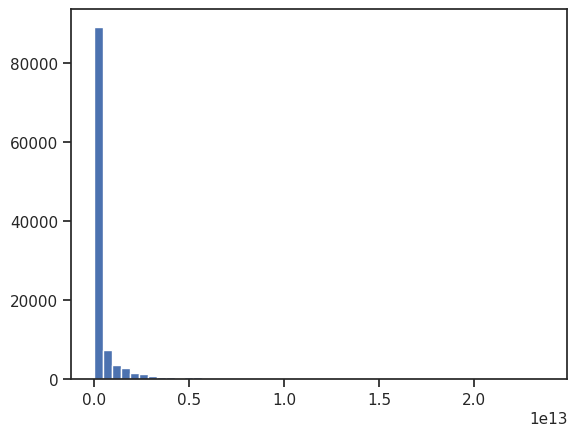

In [ ]:
plt.hist(data['GrossNationalIncome'], 50)
plt.show()

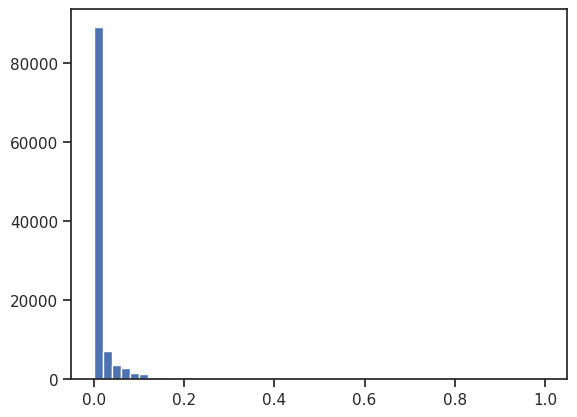

In [ ]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование данных на основе Z-оценки

In [ ]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['GrossNationalIncome']])

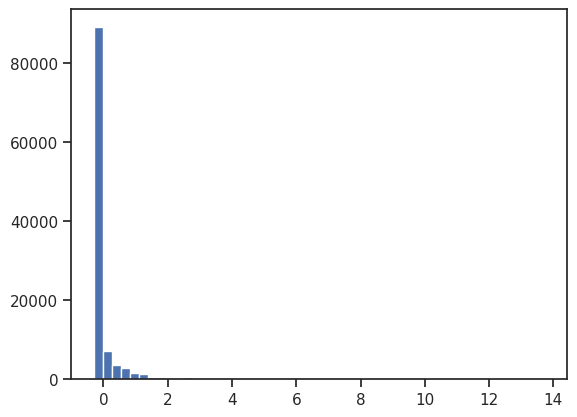

In [ ]:
plt.hist(sc2_data, 50)
plt.show()